In [57]:
# example of chi squared feature selection for categorical data
#import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [58]:
# load the dataset
#filename = "train.csv"
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
##    data = read_csv(filename, header=None)
    data = read_csv(filename)
    # retrieve numpy array
#    dataset = data.values
    # split into input (X) and output (y) variables
##    X = dataset[:, :-1]
#######
    data[['MasVnrType','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']] = data[['MasVnrType','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']].fillna('None')

    X = data[['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                 'Neighborhood','BldgType','HouseStyle','RoofStyle','RoofMatl','Condition1','Condition2',
                 'Exterior1st','Exterior2nd',
                 'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',#'Heating','HeatingQC',
                 'CentralAir',
                 'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual',
                 'GarageCond','PavedDrive','SaleType','SaleCondition']]
###    X = dataset.select_dtypes(include ='object')
    y = data[['SalePrice']]
    # format all fields as string
#    X = X.astype(str)
    return X, y

In [59]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [60]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [61]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 104.074610
Feature 1: 2.651216
Feature 2: 754.171330
Feature 3: 109.830005
Feature 4: 215.500000
Feature 5: 550.350844
Feature 6: 765.774121
Feature 7: 2034.506227
Feature 8: 1825.017229
Feature 9: 769.995743
Feature 10: 323.917487
Feature 11: 202.782369
Feature 12: 206.998282
Feature 13: 28.533617
Feature 14: 638.270749
Feature 15: 721.138173
Feature 16: 151.129933
Feature 17: 183.315893
Feature 18: 77.867535
Feature 19: 279.017331
Feature 20: 516.332218
Feature 21: 151.962028
Feature 22: 436.446988
Feature 23: 973.993341
Feature 24: 143.504713
Feature 25: 47.497618
Feature 26: 244.877935
Feature 27: 272.227279
Feature 28: 75.300149
Feature 29: 1163.020218
Feature 30: 591.767715
Feature 31: 117.732389
Feature 32: 80.484761
Feature 33: 82.446105
Feature 34: 191.702007
Feature 35: 206.286233


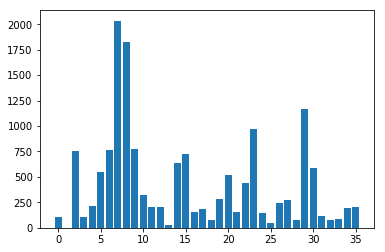

In [62]:

# load the dataset
X, y = load_dataset('train.csv')

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=1)

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# prepare output data
#y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
#X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train, X_test_enc)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()